# Desafío - Gráficos y correlación
## Camila Vera Villa / Lunes 08 de julio

### 1. Importar librerías y .csv

* Importe las librerías básicas para el análisis de datos
* Descarge e importe el archivo nations.csv . warning: va a encontrar un error en el formato
¿Cómo lo podemos solucionar?.

R: Agregando ***,encoding = 'ISO-8859-1df' *** luego de 'nations.csv'.
 El error es en el formato de codificación de los caracteres, se soluciona definiendo el parametro ISO para cambiar la codificación y asi pueda cargar correctamente el dataset.

#### La base de datos contiene información a nivel mundial sobre demografía:
   * country : País.
   * region : Continente del país.
   * gdp : Producto Interno Bruto per cápita, precios 2005.
   * school : Promedio años de escolaridad.
   * adfert : Fertilidad adolescente (Nacimientos 1:1000 en mujeres entre 15 y 19).
   * chldmort : Probabilidad de muerte antes de los 5 años por cada 1000.
   * life : Esperanza de vida al nacer.
   * pop : Población total.
   * urban : Porcentaje de población urbana.
   * femlab : Tasa entre hombres y mujeres en el mercado laboral.
   * literacy : Tasa de alfabetismo.
   * co2 : Toneladas de Co2 mitidas per cápita.
   * gini : Coeficiente de desigualdad del ingreso.

##### Apellidos desde la A hasta la N: Enfocarse en las variables chldmort , adfert y life .

##### Apellidos desde la M hasta la Z: Enfocarse en las variables femlab , literacy y school .

In [291]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

#estilos de graficos
plt.style.use('seaborn')
sns.set_palette('colorblind')

#tamano de los grafico, 8 de ancho y 6 de alto
plt.rcParams['figure.figsize'] = (8,6) 

In [292]:
df = pd.read_csv('nations.csv', encoding = 'ISO-8859-1')

In [293]:
df.head(10)

,Unnamed: 0,country,region,gdp,school,adfert,chldmort,life,pop,urban,femlab,literacy,co2,gini
0,1,Algeria,Africa,7300.399902,6.716667,7.300000,34.75,72.316666,34172236,64.933334,0.4522,72.599998,15.00,NaN
1,2,Benin,Africa,1338.800049,3.100000,111.699997,122.75,54.733334,8237634,41.000000,0.8482,41.700001,1.20,NaN
2,3,Botswana,Africa,12307.400391,8.600000,52.099998,60.25,52.250000,1941233,59.250000,0.8870,84.099998,9.20,NaN
3,4,Burkina Faso,Africa,1063.400024,1.300000,124.800003,170.50,53.783333,15308383,23.583334,0.8584,23.600000,0.20,NaN
4,5,Burundi,Africa,349.200012,2.483333,18.600000,168.50,48.866665,7821783,10.250000,1.0344,66.599998,0.10,33.299999
5,6,Cameroon,Africa,1986.800049,5.650000,127.800003,155.00,50.116665,18564118,56.366665,0.6532,NaN,0.75,NaN
6,7,Cape Verde,Africa,3052.199951,3.500000,81.599998,30.00,73.333336,484867,59.283333,0.6358,84.800003,2.15,NaN
7,8,Central African Rep,Africa,677.000000,3.383333,106.599998,173.50,45.933334,4203917,38.466667,0.8222,55.200001,0.20,NaN
8,9,Chad,Africa,1266.199951,1.500000,164.500000,209.00,48.566666,10509983,26.400000,0.8006,33.599998,0.10,NaN
9,10,Comoros,Africa,1099.000000,2.800000,58.000000,105.75,59.783333,688300,28.000000,0.8554,74.199997,0.40,NaN


#### Apellido: Vera. Enfoque en variables femlab , literacy y school .


### 2. Refactor gráficos matplotlib a seaborn

#### A continuación se presenta una serie de gráficos construídos con matplotlib. 

* Se le pide refactorizarlos utilizando seaborn .

* Se presenta la función que se utilizó para construírlos. Intente llegar al resultado con mayor similitud. 

#### Comente los principales resultados de los gráficos.

### a.1) Original

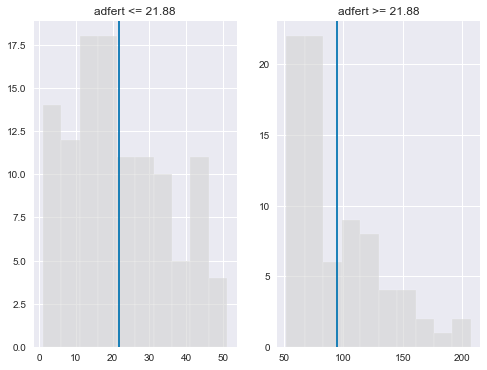

In [294]:
def binarize_histogram(dataframe, variable):
    tmp = dataframe
    tmp['binarize'] = np.where(tmp[variable] > np.mean(tmp[variable]), 1, 0)
   
    hist_1 = tmp[tmp['binarize'] == 1][variable].dropna()
    hist_0 = tmp[tmp['binarize'] == 0][variable].dropna()
    
    plt.subplot(1, 2, 1)
    plt.hist(hist_0, alpha=.6, color='lightgrey')
    plt.axvline(np.mean(hist_0))
    plt.title("{0} <= {1}".format(variable, round(np.mean(hist_0), 3)))
    
    plt.subplot(1, 2, 2)
    plt.hist(hist_1, alpha=.6, color='lightgrey')
    plt.axvline(np.mean(hist_1))
    plt.title("{0} >= {1}".format(variable, round(np.mean(hist_0), 3)))
    
binarize_histogram(df, 'adfert')

### a.1) Refactorizado

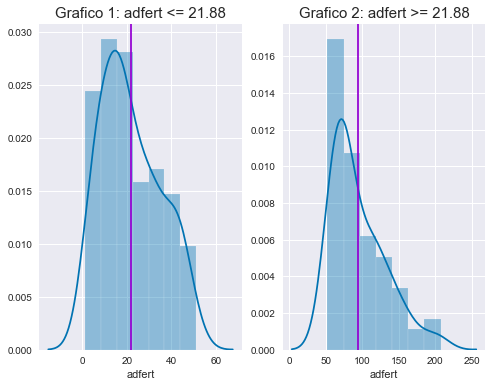

In [295]:
def binarize_histogram_refact(df, var):
    tmp = df
    tmp['binarize'] = np.where(tmp[var] > np.mean(tmp[var]), 1, 0)
    mean = np.mean(tmp[var])
    
    sns.set_palette('colorblind')
    hist_0 = tmp[tmp['binarize'] == 0][var].dropna()
    hist_1 = tmp[tmp['binarize'] == 1][var].dropna()
   
    fig,ax = plt.subplots(1,2)
    sns.distplot(hist_0, ax = ax[0])
    sns.distplot(hist_1, ax = ax[1])
    
    ax[0].axvline(hist_0.mean(), color = 'darkviolet')
    ax[0].set_title("Grafico 1: {0} <= {1}".format(var, round(np.mean(hist_0),3)),size = 15)
    
    
    ax[1].axvline(hist_1.mean(), color = 'darkviolet')
    ax[1].set_title("Grafico 2: {0} >= {1}".format(var, round(np.mean(hist_0),3)), size = 15)
       
binarize_histogram_refact(df,'adfert')   

#### a.1) Comentario:
Estos histogramas muestran la variable Fertilidad Adolescente (adfert) binarizada con valores bajo el promedio (Grafico 1) y sobre el promedio (Grafico 2).
En los casos bajo el promedio, los valores se concentran entre los 0 - 20 nacimientos para la tasa de fertilidad. En el caso de los valores que están sobre el promedio, se concentran entre 50 y 100 nacimientos.


### Graficos con variables femlab , literacy y school 


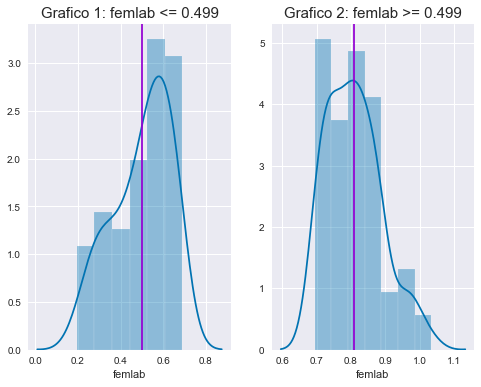

In [296]:
def binarize_histogram_refact(df, var):
    tmp = df
    tmp['binarize'] = np.where(tmp[var] > np.mean(tmp[var]), 1, 0)
    mean = np.mean(tmp[var])
    
    sns.set_palette('colorblind')
    hist_0 = tmp[tmp['binarize'] == 0][var].dropna()
    hist_1 = tmp[tmp['binarize'] == 1][var].dropna()
   
    fig,ax = plt.subplots(1,2)
    sns.distplot(hist_0, ax = ax[0])
    sns.distplot(hist_1, ax = ax[1])
    
    ax[0].axvline(hist_0.mean(), color = 'darkviolet')
    ax[0].set_title("Grafico 1: {0} <= {1}".format(var, round(np.mean(hist_0),3)),size = 15)
    
    
    ax[1].axvline(hist_1.mean(), color = 'darkviolet')
    ax[1].set_title("Grafico 2: {0} >= {1}".format(var, round(np.mean(hist_0),3)), size = 15)
       
binarize_histogram_refact(df,'femlab')

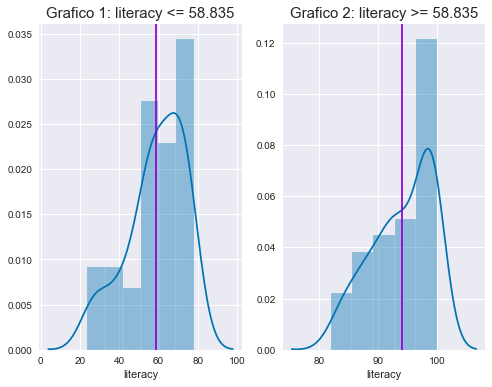

In [297]:
def binarize_histogram_refact(df, var):
    tmp = df
    tmp['binarize'] = np.where(tmp[var] > np.mean(tmp[var]), 1, 0)
    mean = np.mean(tmp[var])
    
    sns.set_palette('colorblind')
    hist_0 = tmp[tmp['binarize'] == 0][var].dropna()
    hist_1 = tmp[tmp['binarize'] == 1][var].dropna()
   
    fig,ax = plt.subplots(1,2)
    sns.distplot(hist_0, ax = ax[0])
    sns.distplot(hist_1, ax = ax[1])
    
    ax[0].axvline(hist_0.mean(), color = 'darkviolet')
    ax[0].set_title("Grafico 1: {0} <= {1}".format(var, round(np.mean(hist_0),3)),size = 15)
    
    
    ax[1].axvline(hist_1.mean(), color = 'darkviolet')
    ax[1].set_title("Grafico 2: {0} >= {1}".format(var, round(np.mean(hist_0),3)), size = 15)
       
binarize_histogram_refact(df,'literacy')

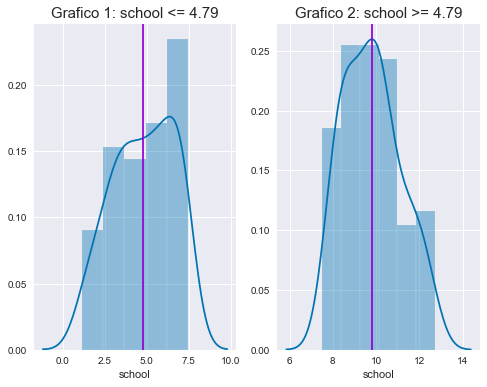

In [298]:
def binarize_histogram_refact(df, var):
    tmp = df
    tmp['binarize'] = np.where(tmp[var] > np.mean(tmp[var]), 1, 0)
    mean = np.mean(tmp[var])
    
    sns.set_palette('colorblind')
    hist_0 = tmp[tmp['binarize'] == 0][var].dropna()
    hist_1 = tmp[tmp['binarize'] == 1][var].dropna()
   
    fig,ax = plt.subplots(1,2)
    sns.distplot(hist_0, ax = ax[0])
    sns.distplot(hist_1, ax = ax[1])
    
    ax[0].axvline(hist_0.mean(), color = 'darkviolet')
    ax[0].set_title("Grafico 1: {0} <= {1}".format(var, round(np.mean(hist_0),3)),size = 15)
    
    
    ax[1].axvline(hist_1.mean(), color = 'darkviolet')
    ax[1].set_title("Grafico 2: {0} >= {1}".format(var, round(np.mean(hist_0),3)), size = 15)
       
binarize_histogram_refact(df,'school')

### a.2) Original

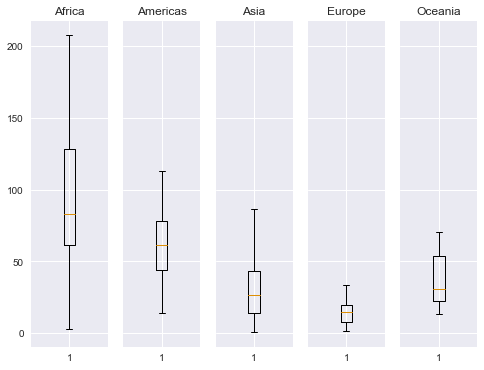

In [299]:
def grouped_boxplot(dataframe, variable, group_by):
    tmp = dataframe
    stratify_by = tmp[group_by].unique()
    if len(stratify_by) / 2 > 3:
        fig, ax = plt.subplots(2, len(stratify_by),sharey=True)
    else:
        fig, ax = plt.subplots(1, len(stratify_by),sharey=True)
    for i, n in enumerate(stratify_by):
        ax[i].boxplot(tmp[tmp[group_by] == n][variable])
        ax[i].set_title(n)
grouped_boxplot(df, 'adfert', 'region')

### a.2) Refactorizado

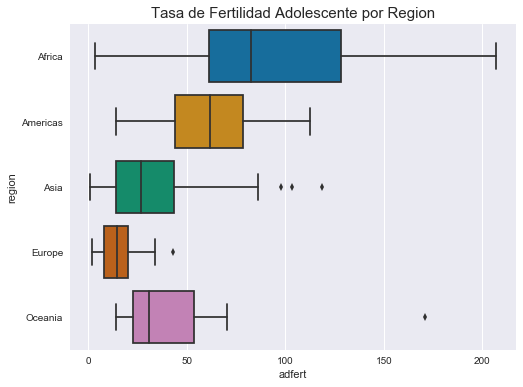

In [300]:
def grouped_boxplot_refact(df, var, group_by):
    
    sns.boxplot(x = var, y = group_by, data = df)
    plt.title('Tasa de Fertilidad Adolescente por Region', size = 15)
    plt.rcParams['figure.figsize'] = (10,8)
    
grouped_boxplot_refact(df, 'adfert', 'region')


#### a.2) Comentario:
Este gráfico de boxplot muestra el rango de valores de la variable Fertilidad Adolescente (adfert) ordenada por regiones (continentes) alfabeticamente.
Se puede desprender que en la region: Africa se tienen las mayores tasas de Fertilidad Adolescente, seguido de America, Oceania, Asia y finalmente Europa, region con la menor tasa F. Adolescente.

### Graficos con variables femlab , literacy y school 

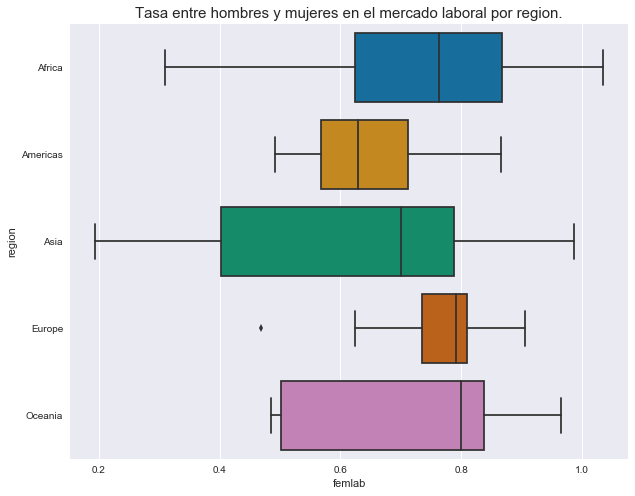

In [301]:
def grouped_boxplot_refact(df, var, group_by):
    
    sns.boxplot(x = var, y = group_by, data = df)
    plt.title('Tasa entre hombres y mujeres en el mercado laboral por region.', size = 15)
    plt.rcParams['figure.figsize'] = (10,8)
    sns.set_style('white')
    
grouped_boxplot_refact(df, 'femlab', 'region')

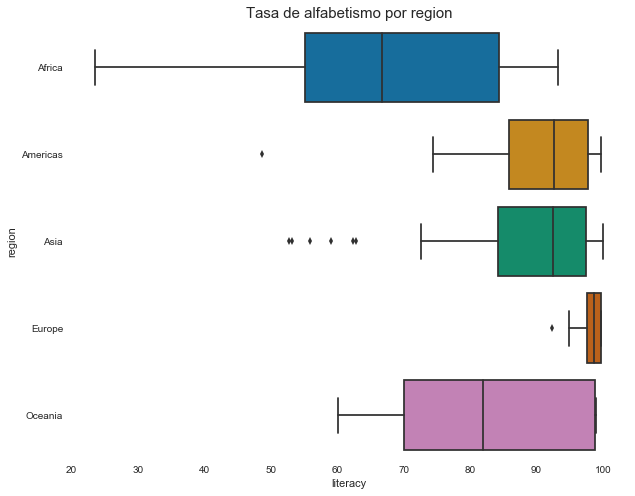

In [302]:
def grouped_boxplot_refact(df, var, group_by):
    
    sns.boxplot(x = var, y = group_by, data = df)
    plt.title('Tasa de alfabetismo por region', size = 15)
    plt.rcParams['figure.figsize'] = (10,8)
    sns.set_style('white')
    
grouped_boxplot_refact(df, 'literacy', 'region')

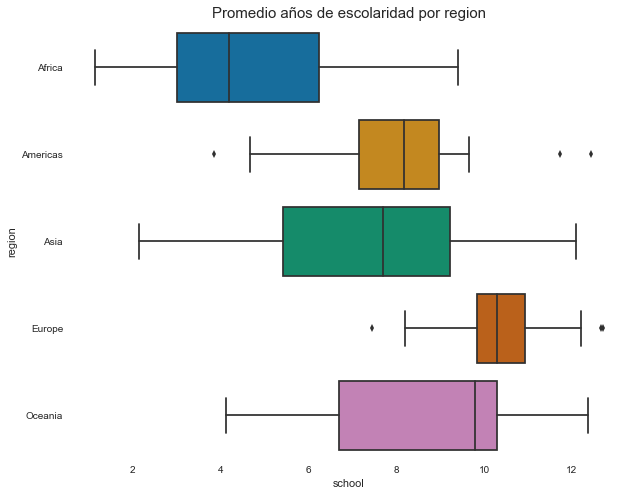

In [303]:
def grouped_boxplot_refact(df, var, group_by):
    
    sns.boxplot(x = var, y = group_by, data = df)
    plt.title('Promedio años de escolaridad por region', size = 15)
    plt.rcParams['figure.figsize'] = (10,8)
    sns.set_style('white')
    
grouped_boxplot_refact(df, 'school', 'region')

### b) Original

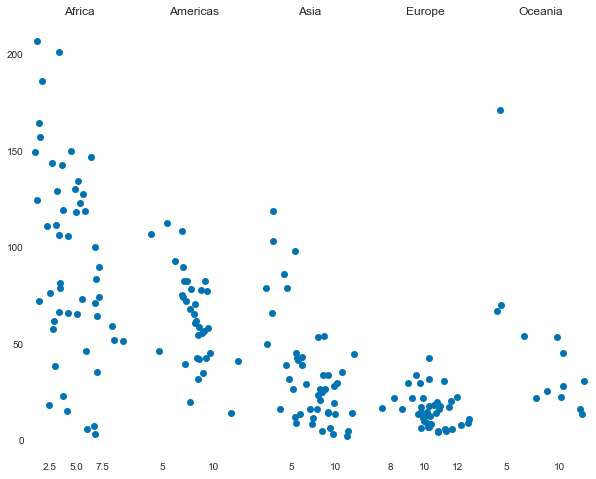

In [304]:
def grouped_scatterplot(dataframe, x, y, group_by):
    tmp = dataframe
    stratify_by = tmp[group_by].unique()
    
    if len(stratify_by) / 2 > 3:
        fig, ax = plt.subplots(2, len(stratify_by),sharey=True)
    else:
        fig, ax = plt.subplots(1, len(stratify_by),sharey=True)
    
    for i, n in enumerate(stratify_by):
        tmp_group_plt = tmp[tmp[group_by] == n]
        ax[i].plot(tmp_group_plt[x], tmp_group_plt[y], 'o')
        ax[i].set_title(n)
grouped_scatterplot(df, 'school', 'adfert', 'region')

### b) Refactorizado

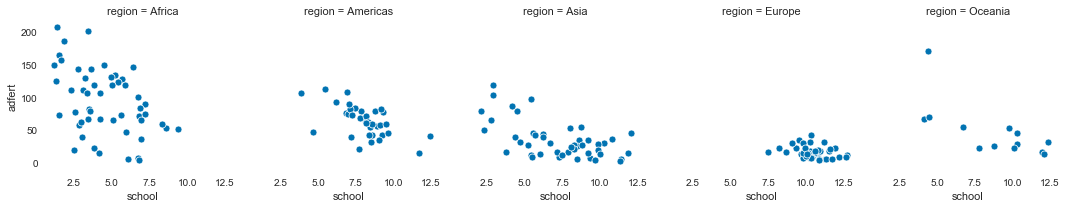

In [305]:
def grouped_scatterplot_refact (df, var_x, var_y, group_by):
    grid = sns.FacetGrid(df, col = group_by)
    grid.map(sns.scatterplot, var_x, var_y)
    
    #caracteristicas del grafico
    sns.set_style('white')
      
grouped_scatterplot_refact (df, 'school','adfert', 'region')

### Comentario
Los gráficos de scatterplot muestran la dispersion de las variables school, adfert y region. De estos se desprende que a  medida que aumenta el nivel de escolaridad (promedio de años de escolaridad) disminuye inversamente proporcional  la fertilidad adolescente. Ésta tendencia se evidencia con mayor claridad en aquellas regiones que tienen las mayores tasas de fertilidad adolescente, como África y Americas. En el caso de Europa,que es la región con menor tasa de fertilidad, se desprende que los valores son casi completamente opuestos a Africa, existiendo una norable mayor escolaridad y con valores muy concentrados hacia los 10 y 12,5 años.

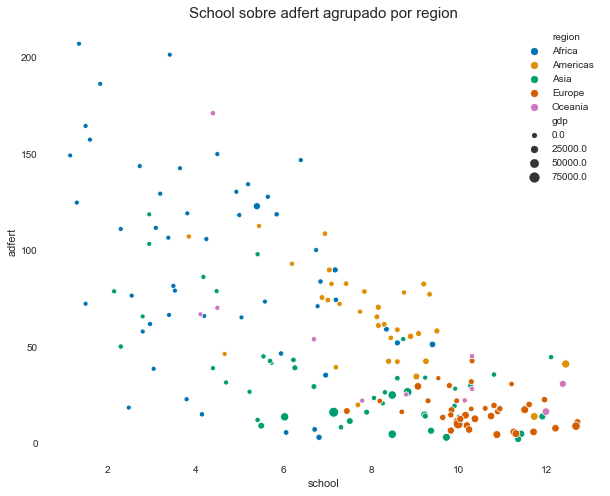

In [306]:
#Grafico con 4 dimensiones: adfert, school, region y gdp
def grouped_scatterplot_refact2 (df, var_x, var_y, group_by, size):
    ax = sns.scatterplot(x = var_x, y = var_y,
                         hue = group_by, data = df, size = 'gdp')
    plt.title('School sobre adfert agrupado por region', size = 15)
    sns.set_style('white')
    
grouped_scatterplot_refact2 (df, 'school','adfert', 'region', 'gdp')

### 3. Genere un heatmap entre todas las variables

* En base a las variables de interés asignadas, comente cuáles son las principales correlaciones existentes, tomando como criterio de corte aquellas superior a .6

In [307]:
# Elimina la primera columnna de indices
df.drop(df.columns[[0]], axis=1, inplace=True)
# matriz de correlaciones de Pandas
df.corr()  

,gdp,school,adfert,chldmort,life,pop,urban,femlab,literacy,co2,gini,binarize
gdp,1.000000,0.573280,-0.517120,-0.516019,0.611219,-0.053251,0.656482,0.009827,0.442487,0.826819,-0.079037,0.468183
school,0.573280,1.000000,-0.675219,-0.772668,0.725207,-0.058784,0.565080,0.094663,0.854910,0.416818,-0.201446,0.848438
adfert,-0.517120,-0.675219,1.000000,0.777416,-0.731787,-0.004868,-0.451075,0.032290,-0.676430,-0.437615,0.354003,-0.541506
chldmort,-0.516019,-0.772668,0.777416,1.000000,-0.923563,-0.005432,-0.556266,0.137984,-0.790070,-0.416292,0.063676,-0.608003
life,0.611219,0.725207,-0.731787,-0.923563,1.000000,0.005418,0.623945,-0.174210,0.664518,0.445990,-0.025493,0.586359
pop,-0.053251,-0.058784,-0.004868,-0.005432,0.005418,1.000000,-0.066228,-0.057245,-0.030396,-0.023302,-0.015499,-0.126795
urban,0.656482,0.565080,-0.451075,-0.556266,0.623945,-0.066228,1.000000,-0.165942,0.478254,0.522432,0.138066,0.396503
femlab,0.009827,0.094663,0.032290,0.137984,-0.174210,-0.057245,-0.165942,1.000000,-0.075675,-0.101363,-0.049513,0.091777
literacy,0.442487,0.854910,-0.676430,-0.790070,0.664518,-0.030396,0.478254,-0.075675,1.000000,0.349137,-0.028563,0.640000
co2,0.826819,0.416818,-0.437615,-0.416292,0.445990,-0.023302,0.522432,-0.101363,0.349137,1.000000,-0.110875,0.318148


Text(0.5, 1.0, 'Grafico de correlaciones de variables')

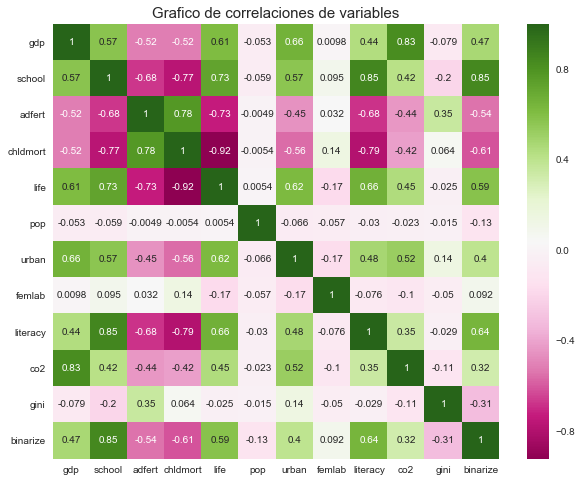

In [308]:
#mapa de calor de las correlaciones
sns.heatmap(df.corr(), cmap='PiYG',annot=True)
plt.title('Grafico de correlaciones de variables',size = 15)


Text(0.5, 1.0, 'Grafico de correlaciones con criterio de corte superior a 0.6')

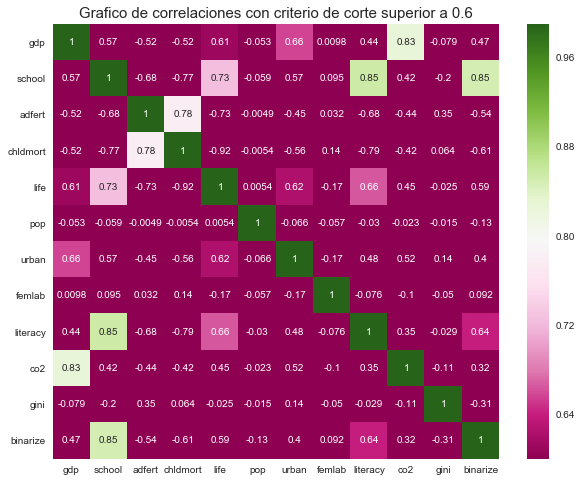

In [309]:
# mapa de calor de las correlaciones con criterio de corte superior a 0.6
sns.heatmap(df.corr(), cmap='PiYG',vmin=0.6, vmax=0.99, annot=True)
plt.title('Grafico de correlaciones con criterio de corte superior a 0.6',size = 15)

Del grafico se desprende que entre las variables mas relacionadas se encuentran: school-literacy,con un 0.85; seguida por gdp-co2, con un 0.83.
Las variables con mayor correlacion inversa corresponen a la mayoria, destacandose en casos extremos las variables: adfert-gdp con -0.52 y childmort-school.

### 4. En base a las principales correlaciones, sepárelas en un nuevo objeto y calcule la matriz de correlaciones para todas las regiones

* tip: Genere una nueva tabla segmentando con la siguiente sintáxis: tmp = df.loc[:,['variables', 'a', 'agregar']] . No olvide agregar la variable region

* tip: Genere un loop para recorrer cada región y generar un heatmap.
* Comente brevemente las principales correlaciones a través de las regiones.

In [310]:
#nuevo objeto con variables segun apellido

tmp = df.loc[:,['region', 'femlab' ,'literacy', 'school', 'adfert']]

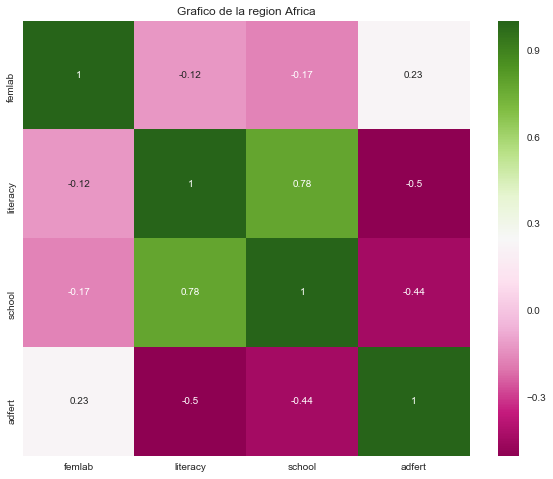

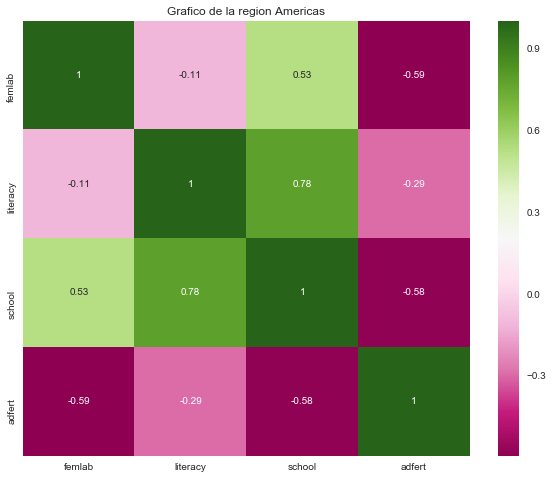

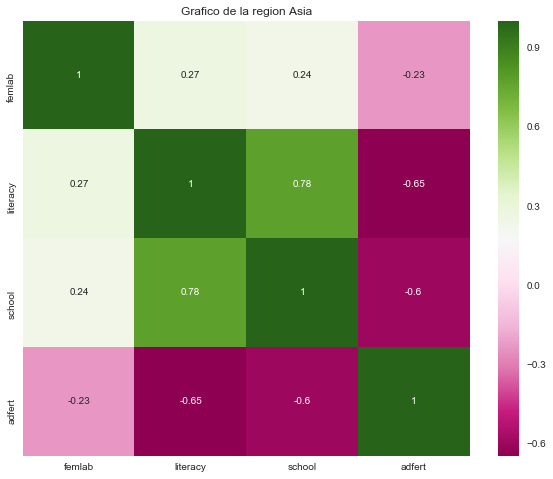

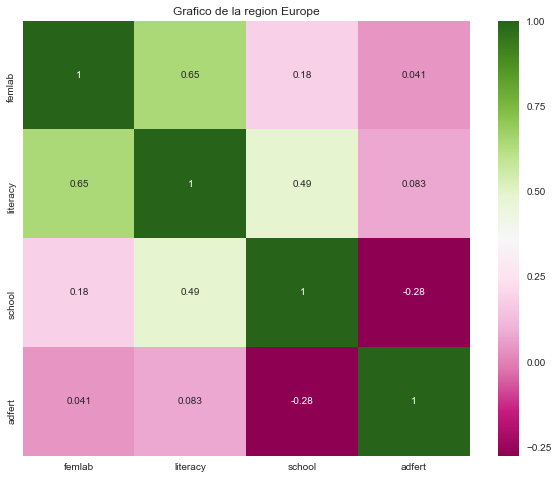

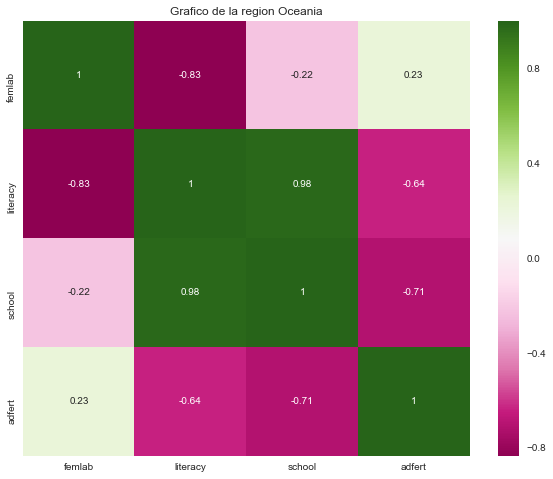

In [311]:
#funcion con nuevo objeto
def new_heatmap(df):
    corr_df = df.corr()
    sns.heatmap(corr_df, cmap = 'PiYG', annot = True)
    
cada_region = tmp['region'].unique().tolist() #cada region a lista

#loop
for continente in cada_region:
    plt.title(f'Grafico de la region {continente}')
    new_heatmap(tmp[tmp['region'] == continente])
    plt.show()
    


#### Africa
Del grafico se desprende que las variables mientras mas se acercan al verde mas relacionadas se encuentran. Es el caso de las variables school-literacy, en donde los anios de escolariad y la tasa de alfabetismo presentan una correlacion de 0.78.
Mientras mas cercanas al Burdeo existe mayor correlacion inversa, con valores negativos extremos se encuntran las variables adfert-literacy com ima correlacion de -0.5.

#### Americas
Al igual que en Africa, la correlacion de las variables school-literacy presentan una correlacion de 0.78. La siguirente correlacion mas alta corresponde a las variables school-femlab, que relaciona la tasa entre hombres y mujeres en el sistema laboral junto a la escolaridad.
Las variables con mayor correlacion inversa corresponden a femlab-adfert.

#### Asia
Al igual que en en las dos regiones anteriores, la correlacion mas alta corresponde a las variables school-literacy presentan una correlacion de 0.78. La siguirente correlacion mas alta corresponde a las variables literacy-femlab.
Las variables con mayor correlacion inversa corresponden a adfert-literacy.

#### Europe
La correlacion mas alta corresponde a las variables femlab-literacy presentan una correlacion de 0.65, seguido por school-literacy con un 0.49.
Las variables con mayor correlacion inversa corresponden a adfert-school con un -0.28.

#### Oceania
La correlacion mas alta, corresponde al caso de las variables school-literacy, el cual posee una tasa de 0.98 siendo la mas alta entre todas las variables y regiones. 
Las variables con mayor correlacion inversa corresponden a literacy-femlab con un -0.83;


